In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygad
import sys

### Algorytm Rungego-Kutty 

In [2]:
def rk4(f, s0, x0, xf, n, a, b):
    x = np.linspace(x0, xf, n+1) #x grid
    s = np.array((n+1)*[s0]) #array of the state of the sytem for each x
    h = x[1] - x[0] #stepsize
    for i in range(n):       #Fourth Order Runge Kutta Method
        k0 = h * f(s[i], a, b) 
        k1= h * f(s[i] + 0.5 * k0, a, b)
        k2 = h * f(s[i] + 0.5 * k1, a, b)
        k3 = h * f(s[i] + k2, a, b)
        s[i+1] = s[i] + (k0 + 2*(k1 + k2) + k3) / 6.
    return x, s

In [77]:
def f(u, a, b):
    S,I,R = u
    N = sum(u)
    dS = -a*S*I  #dS/dt = -aS(t)I(t)
    dI = a*S*I - b*I   #dI/dt = aS(t)I(t)-bI(t)
    dR = b*I #dR/dt = bI(t)
    return np.array([dS, dI, dR])

In [78]:
a = 0.2
b = 0.1
x, s = rk4(f, np.array([235.0, 14.0, 0.0]), 0., 109., 109000, a, b)

idk

 𝑀 – the number of rows of vectors of
experimental data of the sample?

In [79]:
def cost():
    return 

### Algorytm genetyczny - przykład

Szukamy maksimum funkcji f(x, y) = - (x-7)^2 - exp(y^2)

In [80]:
def fitness_func(solution, solution_idx):
    return - (solution[0] - 7)**2 - np.exp(solution[1]**2)

In [81]:
num_generations = 30
num_parents_mating = 4

sol_per_pop = 8
num_genes = 2

init_range_low = -10
init_range_high = 10

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [82]:
def on_generation(ga_instance):
    print("Generation : ", ga_instance.generations_completed)
    print("Fitness of the best solution :", ga_instance.best_solution()[1])

In [83]:
ga_instance = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = fitness_func,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       init_range_low = init_range_low,
                       init_range_high = init_range_high,
                       parent_selection_type = parent_selection_type,
                       keep_parents = keep_parents,
                       crossover_type = crossover_type,
                       mutation_type = mutation_type,
                       mutation_percent_genes = mutation_percent_genes,
                       on_generation = on_generation)

In [84]:
ga_instance.run()

Generation :  1
Fitness of the best solution : -23.109456283906542
Generation :  2
Fitness of the best solution : -8.59974191384883
Generation :  3
Fitness of the best solution : -6.571537020083787
Generation :  4
Fitness of the best solution : -6.571537020083787
Generation :  5
Fitness of the best solution : -4.9725965942392065
Generation :  6
Fitness of the best solution : -4.903667284508916
Generation :  7
Fitness of the best solution : -2.500832820609117
Generation :  8
Fitness of the best solution : -1.5170505895728412
Generation :  9
Fitness of the best solution : -1.5170505895728412
Generation :  10
Fitness of the best solution : -1.5170505895728412
Generation :  11
Fitness of the best solution : -1.2867477354446049
Generation :  12
Fitness of the best solution : -1.0284448521331948
Generation :  13
Fitness of the best solution : -1.0284448521331948
Generation :  14
Fitness of the best solution : -1.0284448521331948
Generation :  15
Fitness of the best solution : -1.028444852133

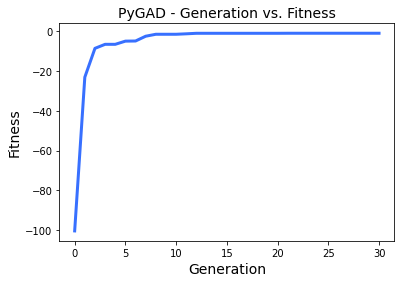

In [85]:
ga_instance.plot_fitness();

In [86]:
ga_instance.best_solution() 

(array([ 7.04151364, -0.01503129]), -1.0019493472201206, 0)

### Algorytm genetyczny - MAPE

In [87]:
def MAPE(xs, ys): #average absolute error
    return sum(abs(xs - ys)/xs)

In [88]:
beta = 0.2
gamma = 0.1
x, data = rk4(f, np.array([235.0, 14.0, 0.0]), 0., 109., 109000, beta, gamma)
I = np.array([x[1] for x in data])

In [89]:
def fitness_func(solution, solution_idx): #solution = [beta, gamma]
    if solution[0] > 1 or solution[0] < 0 or solution[1] > 1 or solu < 0:
        return -sys.maxsize - 1
    else:
        x, s = rk4(f, np.array([235.0, 14.0, 0.0]), 0., 109., 109000, solution[0], solution[1])
        I_m = np.array([x[1] for x in s])
        return -MAPE(I, I_m) #albo -MAPE(I_m, I)

In [90]:
ga_instance = pygad.GA(num_generations = 10,
                       num_parents_mating = num_parents_mating,
                       fitness_func = fitness_func,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       init_range_low = 0,
                       init_range_high = 1,
                       parent_selection_type = parent_selection_type,
                       keep_parents = keep_parents,
                       crossover_type = crossover_type,
                       mutation_type = mutation_type,
                       mutation_percent_genes = mutation_percent_genes,
                       on_generation = on_generation)

In [ ]:
ga_instance.run()

Generation :  1
Fitness of the best solution : -2213.159746941128
Generation :  2
Fitness of the best solution : -2213.159746941128
Generation :  3
Fitness of the best solution : -2213.159746941128
Generation :  4
Fitness of the best solution : -2213.159746941128
Generation :  5
Fitness of the best solution : -2213.159746941128


In [ ]:
ga_instance.plot_fitness();

In [ ]:
ga_instance.best_solution() 